# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv('HRV.csv')

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

#### totChol fill

<AxesSubplot:xlabel='totChol', ylabel='Count'>

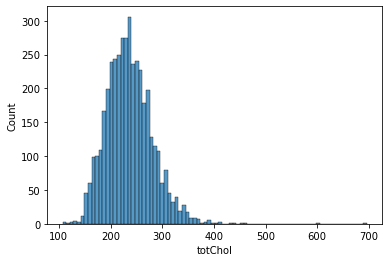

In [6]:
sns.histplot(dataset['totChol'])
#right skewed so use median

In [7]:
cholmed=dataset['totChol'].median()
dataset['totChol'].fillna(cholmed, inplace=True)

In [8]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

#### BMI fill

<AxesSubplot:xlabel='BMI', ylabel='Count'>

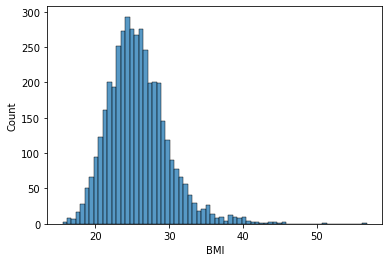

In [9]:
sns.histplot(dataset['BMI'])
#right skewed so use median

In [10]:
bmimed=dataset['BMI'].median()
dataset['BMI'].fillna(bmimed, inplace=True)

In [11]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

#### heartRate fill

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

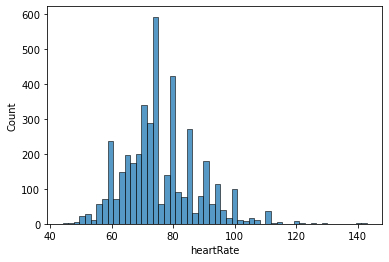

In [12]:
sns.histplot(dataset['heartRate'])
#right skewed so use median

In [13]:
ratemed=dataset['heartRate'].median()
dataset['heartRate'].fillna(ratemed, inplace=True)

In [14]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose          387
TenYearCHD         0
dtype: int64

#### heartRate fill

<AxesSubplot:xlabel='glucose', ylabel='Count'>

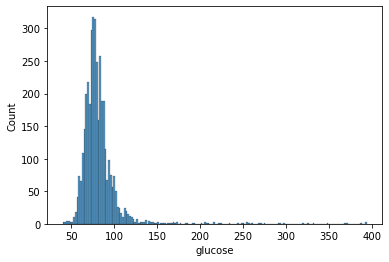

In [15]:
sns.histplot(dataset['glucose'])
#right skewed so use median

In [16]:
glumed=dataset['glucose'].median()
dataset['glucose'].fillna(glumed, inplace=True)

In [17]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [18]:
dataset.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [19]:
X=dataset.drop('TenYearCHD',axis=1)
Y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=50)

## Training the Logistic Regression model 

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Predicting a new result
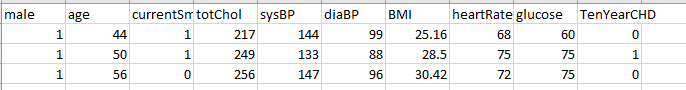

In [22]:
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))
#correct prediction

[0]


In [23]:
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))
#incorrect prediction

[0]


In [24]:
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))
#correct prediction

[0]


### Confusion matrix, Confusion matrix display and classification report

In [25]:
y_pred=classifier.predict(X_test.values)

In [26]:
# Comparing y_test and y_pred
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[705  10]
 [123   9]]


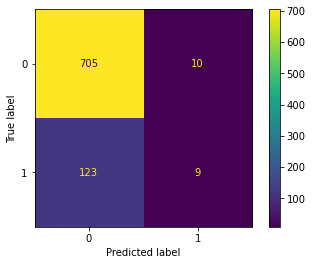

In [27]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

 - True Negative = Actual results were negative and the model predicted a negative.
     The model had 705 of these.
 - False Negative = Actual results were positive and the model predicted a negative.
     The model had 123 of these.
 - False Positive = Actual results were negative and the model predicted a positive.
     The model had 10 of these.
 - True Positive = Actual results were positive and the model predicted a positive.
     The model had 9 of these.

### Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       715
           1       0.47      0.07      0.12       132

    accuracy                           0.84       847
   macro avg       0.66      0.53      0.52       847
weighted avg       0.79      0.84      0.79       847



### Summary

This dataset had information on the potential risk factors of an individual's diagnosis of coronary heart disease. The risk factors are sex, age, smoker, cholesterol, systolic blood pressure, diastolic blood pressure, BMI, heart rate, and gluclose levels. Using python, I conducted a logistic regression model on the dataset to try and predict if an individual had heart disease using risk factors. Using a test size of 20%, the model had an accuracy score of .84 (closer to 1 the better). The model has mostly true negative outcomes, but unfortunately the second most is false negatives, which is the least preferable outcome. 